In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import math

In [2]:
sns.set_style('whitegrid')
pd.set_option('display.max_columns', None)

In [3]:
raw_data = pd.read_csv("Telco_Cusomer_Churn.csv")
raw_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
raw_data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
raw_data['SeniorCitizen'] = raw_data['SeniorCitizen'].astype(bool)
raw_data['TotalCharges'] = raw_data['TotalCharges'].replace(' ', np.nan)
raw_data['TotalCharges'] = raw_data['TotalCharges'].astype(float)
raw_data.drop('customerID', axis=1, inplace = True)

In [7]:
num_columns = raw_data.select_dtypes(include=['float64', 'int64']).columns
cat_columns = raw_data.select_dtypes(include=['object']).columns

In [8]:
raw_data[num_columns].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


In [9]:
for i in cat_columns:
    display(raw_data[i].value_counts())

gender
Male      3555
Female    3488
Name: count, dtype: int64

Partner
No     3641
Yes    3402
Name: count, dtype: int64

Dependents
No     4933
Yes    2110
Name: count, dtype: int64

PhoneService
Yes    6361
No      682
Name: count, dtype: int64

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64

DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64

TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64

StreamingTV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64

StreamingMovies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

Churn
No     5174
Yes    1869
Name: count, dtype: int64

<Axes: >

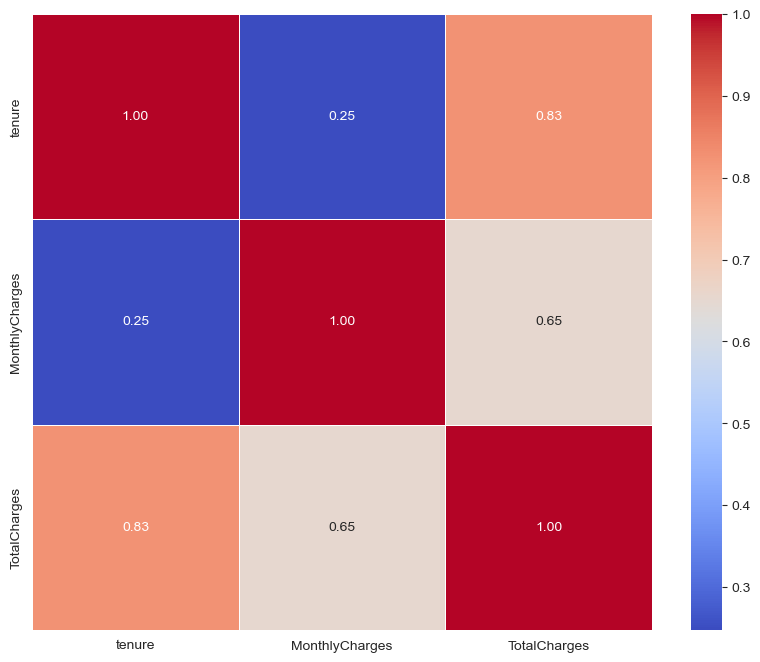

In [10]:
corr_num = raw_data.select_dtypes(include = ['float64', 'int64'])
corr_matrix = corr_num.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

## Outcome:
Tenure and Total Charges appear to have a strong positive linear relationship which makes sense considering longer tenured customers would accumulate more charges over time.

In [11]:
raw_data.drop('TotalCharges', axis=1, inplace = True)

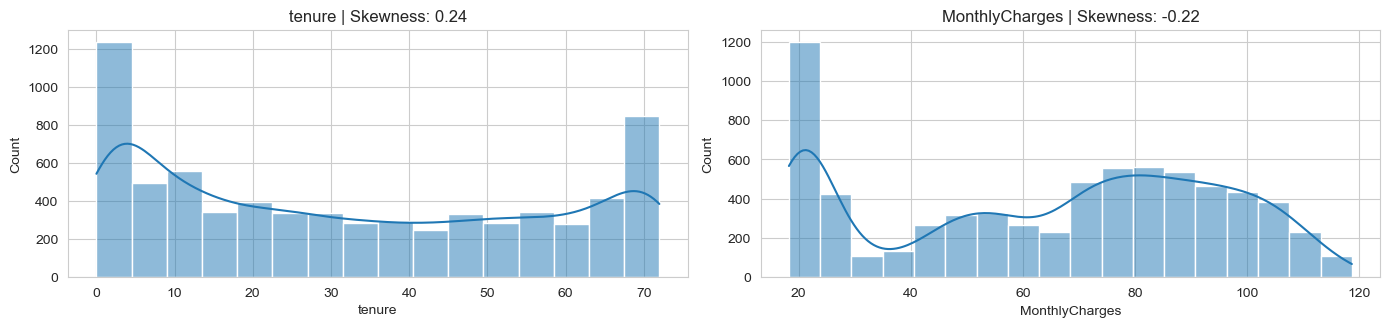

In [12]:
num_columns = raw_data.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(14, len(num_columns) * 3))
for idx, feature in enumerate(num_columns, 1):
    plt.subplot(len(num_columns), 2, idx)
    sns.histplot(raw_data[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(raw_data[feature].skew(), 2)}")

plt.tight_layout()
plt.show()

## Outcome:
No apparent outliers in any of the numeric columns

# EDA

In [13]:
raw_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,Female,False,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,Male,False,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,No
2,Male,False,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes
3,Male,False,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,No
4,Female,False,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,False,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,No
7039,Female,False,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,No
7040,Female,False,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,No
7041,Male,True,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,Yes


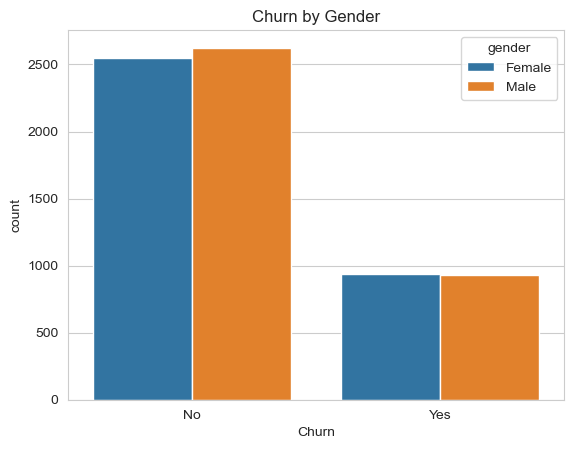

In [14]:
sns.countplot(x='Churn', hue='gender', data=raw_data)
plt.title('Churn by Gender')
plt.show()

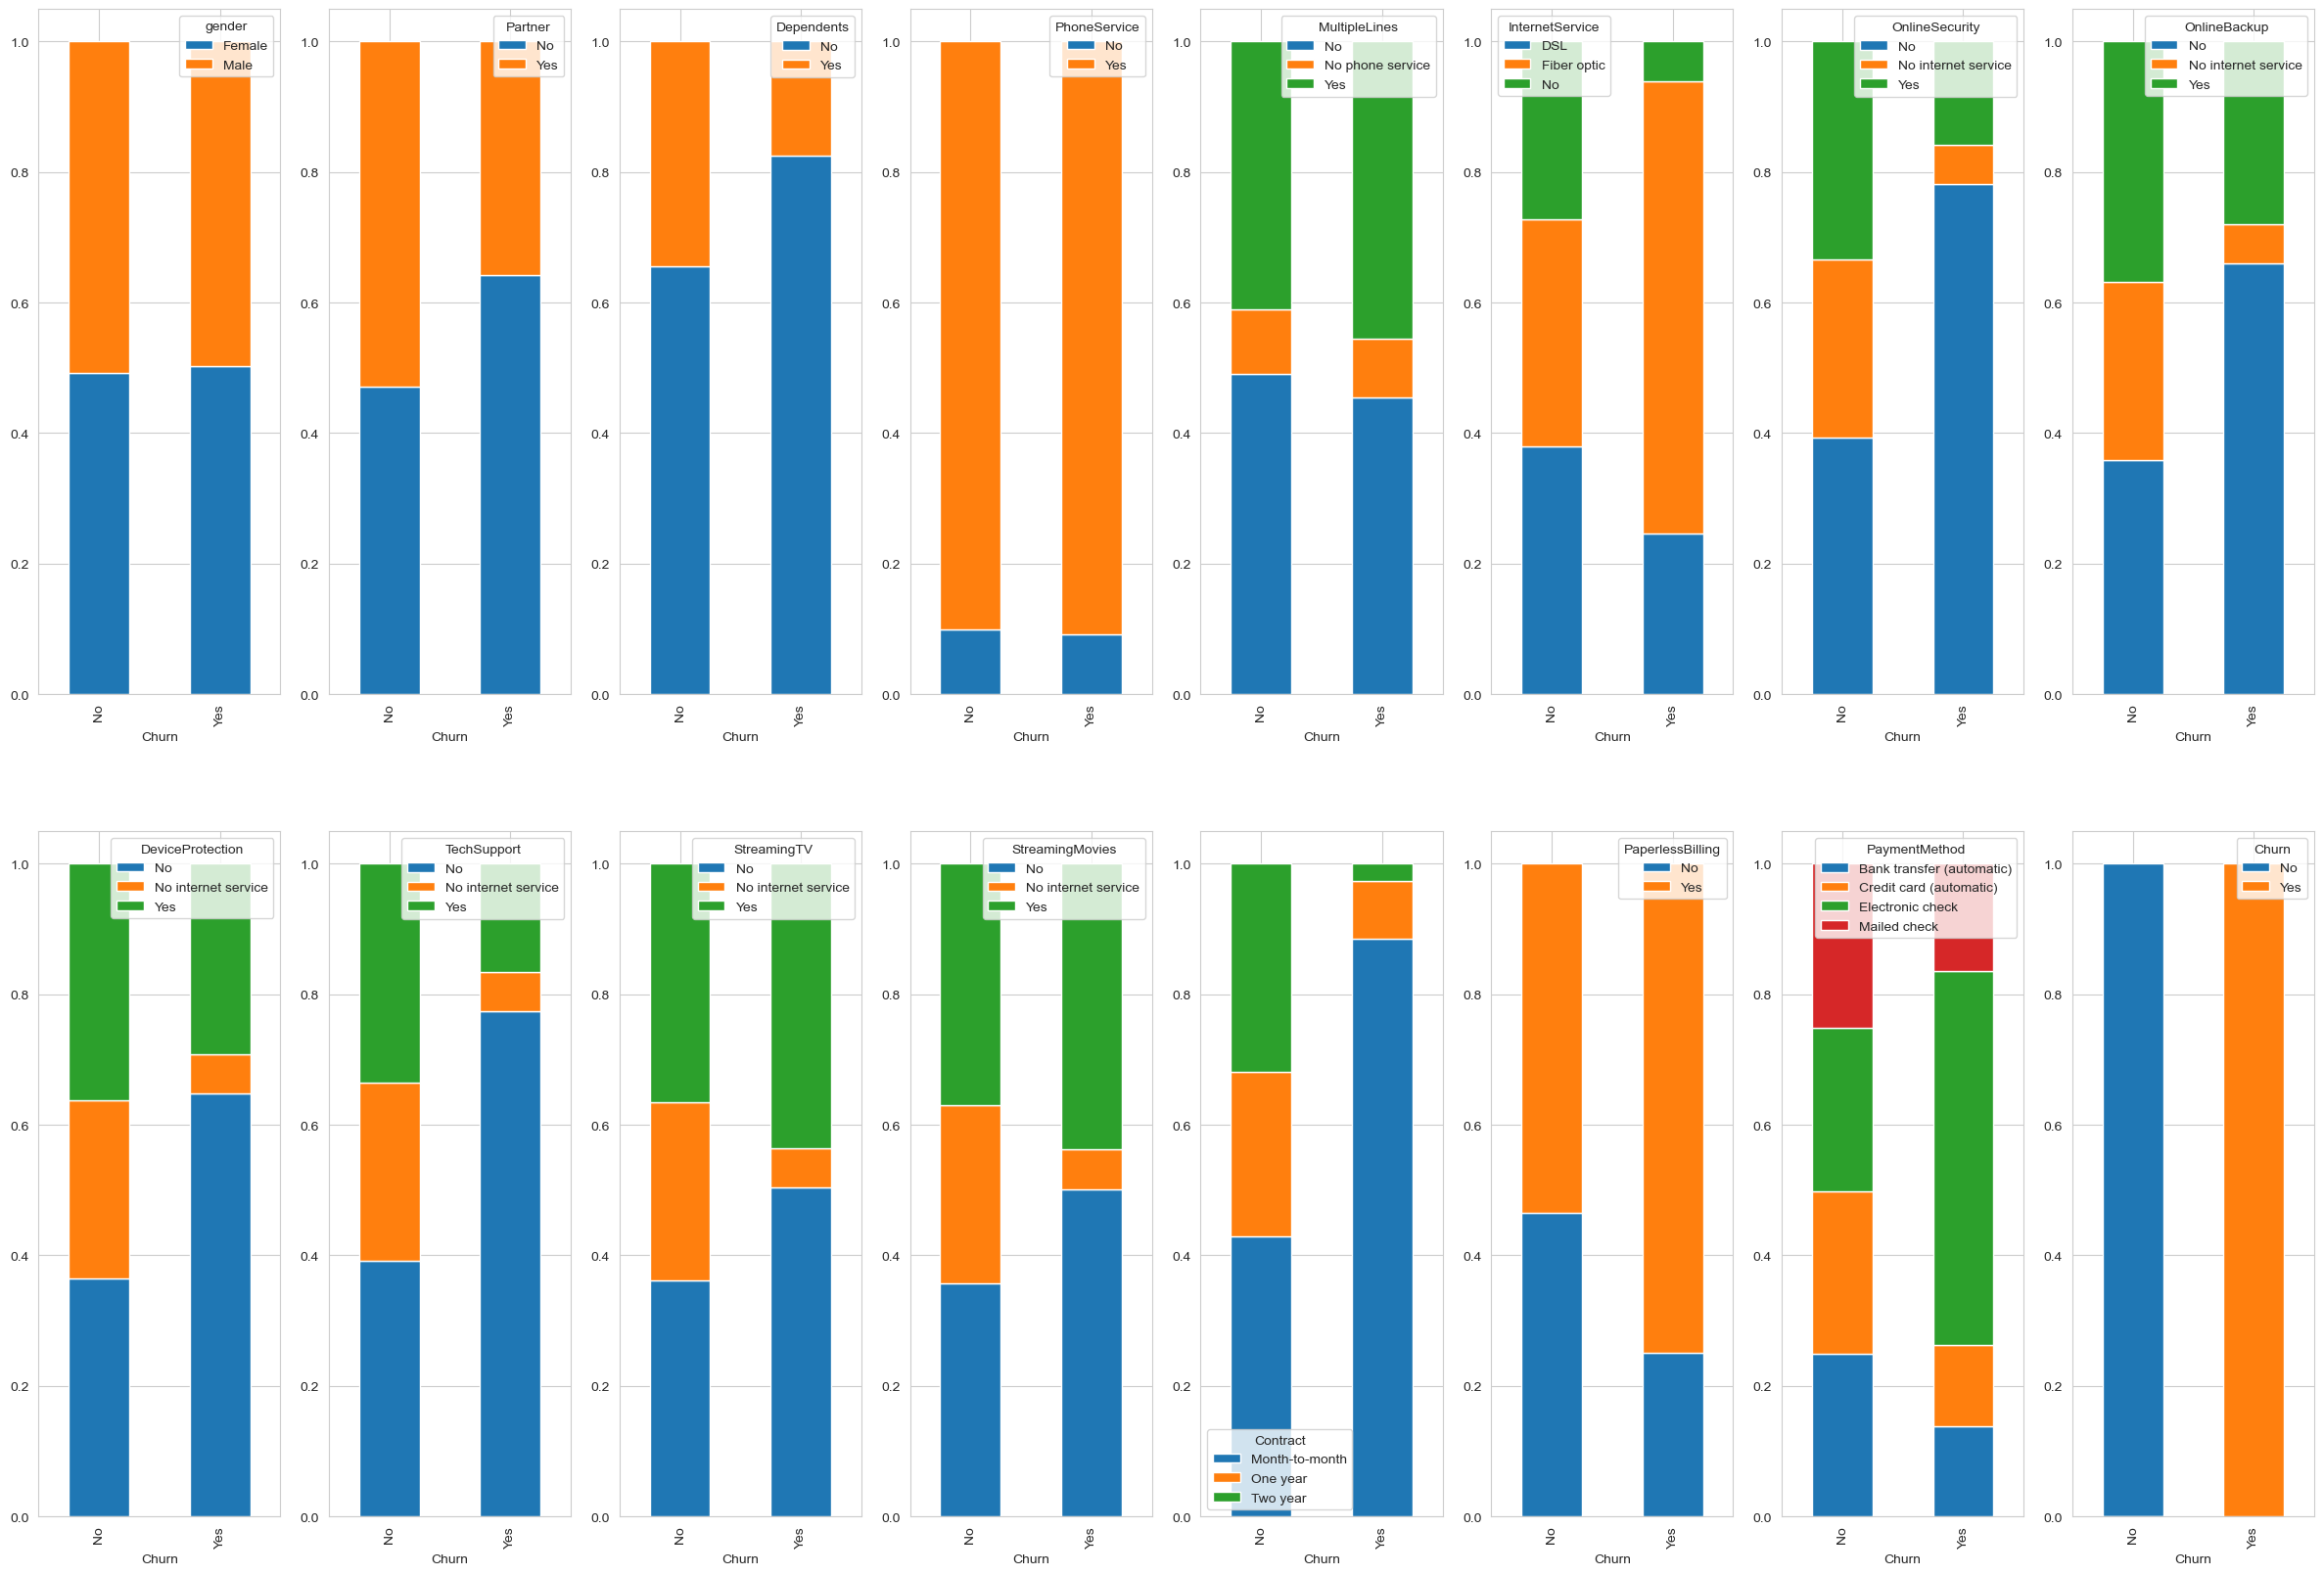

In [15]:
fig, ax = plt.subplots(2, int(len(cat_columns)/2), figsize=(30, 20))
ax_list = list(ax.flat)[::-1]
num_subplots = len(ax_list)
for i in cat_columns:
    prop = raw_data.groupby(['Churn',i]).size().unstack(fill_value=0)
    prop = prop.div(prop.sum(axis=1), axis=0)

    axes = ax_list.pop()
    prop.plot(ax=axes,kind='bar', stacked=True)
plt.show()

## Outcome:
Here are the variables that appear to show some form of relationship with the target predictor: Dependents, Internet Service, Contract, Paperless Billing, Payment Method

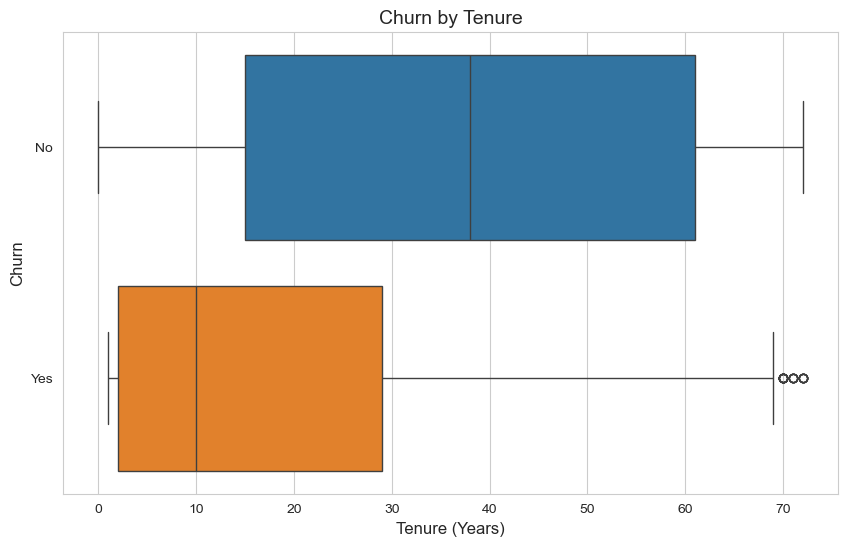

In [16]:
plt.figure(figsize=(10, 6))

sns.boxplot(x='tenure', y='Churn', hue="Churn", data=raw_data)
plt.title('Churn by Tenure', fontsize=14)
plt.xlabel('Tenure (Years)', fontsize=12)
plt.ylabel('Churn', fontsize=12)
plt.show()

## Outcome:

These results align with initial expectations that longer tenured customers tend to churn at a lower rate and that customers with higher monthly bills tend to churn at higher rate.

# Data Preprocessing

In [17]:
binary_map = {'Yes': 1, 'No': 0}
raw_data['Churn'] = raw_data['Churn'].map(binary_map).astype(bool)
raw_data['Partner'] = raw_data['Partner'].map(binary_map).astype(bool)
raw_data['Dependents'] = raw_data['Dependents'].map(binary_map).astype(bool)
raw_data['PhoneService'] = raw_data['PhoneService'].map(binary_map).astype(bool)
raw_data['PaperlessBilling'] = raw_data['PaperlessBilling'].map(binary_map).astype(bool)
raw_data['gender'] = raw_data['gender'].map({'Female': 0, 'Male': 1}).astype(bool)

In [18]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
X = raw_data.drop('Churn',axis= 1)
y = raw_data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn import set_config
set_config(transform_output="pandas")
scaler = StandardScaler()

# Training Data
num_columns = X_train.select_dtypes(include=['float64', 'int64'])
num_columns_scaled = scaler.fit_transform(num_columns)
X_train[num_columns.columns] = num_columns_scaled

cat_columns = X_train.select_dtypes(include=['object', 'bool'])
X_train = pd.get_dummies(X_train, columns=cat_columns.columns)

# Testing Data
num_columns = X_test.select_dtypes(include=['float64', 'int64'])
num_columns_scaled = scaler.fit_transform(num_columns)
X_test[num_columns.columns] = num_columns_scaled

cat_columns = X_test.select_dtypes(include=['object', 'bool'])
X_test = pd.get_dummies(X_test, columns=cat_columns.columns)


In [20]:
X_train

,tenure,MonthlyCharges,gender_False,gender_True,SeniorCitizen_False,SeniorCitizen_True,Partner_False,Partner_True,Dependents_False,Dependents_True,PhoneService_False,PhoneService_True,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_False,PaperlessBilling_True,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1479,0.459838,-0.525944,True,False,True,False,True,False,True,False,True,False,False,True,False,True,False,False,True,False,False,True,False,False,False,False,True,True,False,False,False,False,True,False,False,True,False,True,False,False,True,False,False,True,False
2377,0.581957,-0.317349,False,True,True,False,True,False,False,True,False,True,True,False,False,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False
6613,-1.209111,-1.482142,True,False,True,False,True,False,True,False,False,True,True,False,False,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,True,False,False,True,False,False,False,False,True
6468,-0.761344,-0.674463,False,True,True,False,False,True,True,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,True,False,False,False,True,False
2668,-1.290523,-1.503836,False,True,True,False,True,False,False,True,False,True,True,False,False,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,True,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5218,-1.331229,-1.505504,False,True,True,False,False,True,False,True,False,True,True,False,False,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True
4060,0.866899,-0.048679,False,True,True,False,False,True,False,True,False,True,False,False,True,True,False,False,True,False,False,True,False,False,False,False,True,True,False,False,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False
1346,-0.761344,0.748987,True,False,True,False,False,True,False,True,False,True,False,False,True,False,True,False,True,False,False,True,False,False,False,False,True,True,False,False,True,False,False,False,False,True,True,False,False,False,True,False,False,True,False
3454,-0.150753,-0.973171,True,False,False,True,False,True,False,True,True,False,False,True,False,True,False,False,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False,True


# Model Training

## Logistic Regression

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, f1_score
lin_fit = LogisticRegression()
lin_fit.fit(X_train, y_train)
y_pred_lin = lin_fit.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_lin)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 79.74%


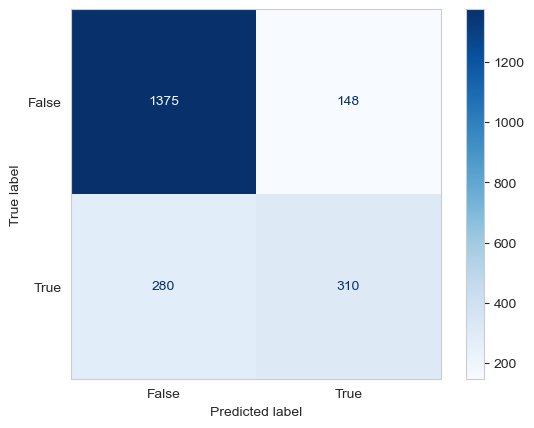

In [22]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_lin),display_labels=lin_fit.classes_)
disp = disp.plot(cmap='Blues')
plt.grid(False)
plt.show()

In [23]:
print("\nIntercept (Bias):")
print(lin_fit.intercept_)


Intercept (Bias):
[-0.26761763]


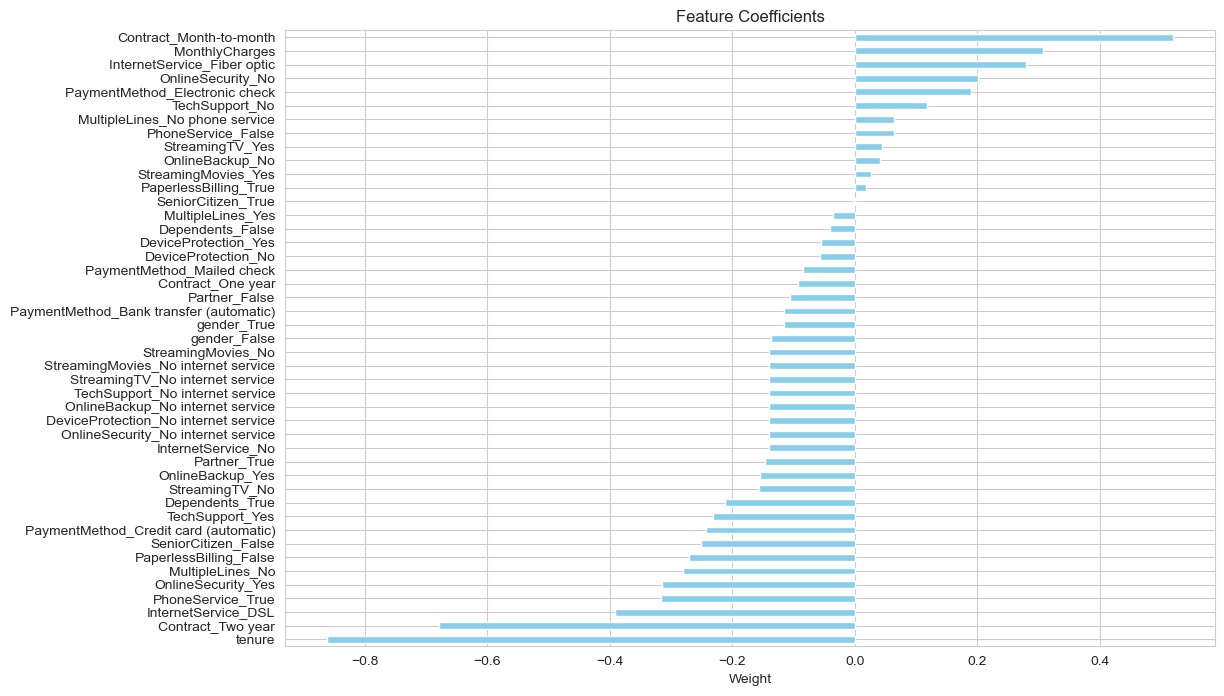

In [24]:
feature_weights = pd.Series(lin_fit.coef_[0], index = lin_fit.feature_names_in_).sort_values(ascending=False)

plt.figure(figsize=(12, 8))
feature_weights.plot.barh(color='skyblue')
plt.xlabel('Weight')
plt.title('Feature Coefficients')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()

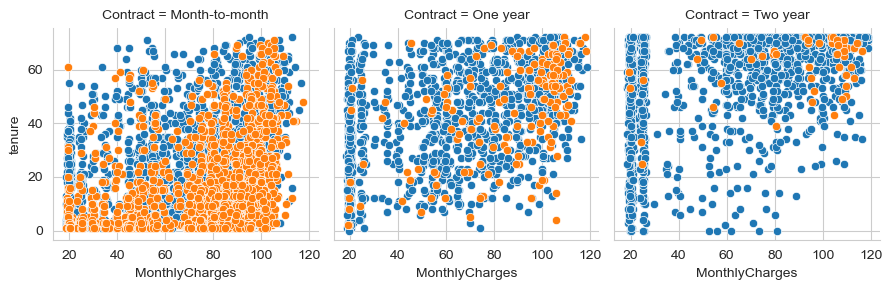

In [25]:
g = sns.FacetGrid(raw_data, col="Contract", hue = "Churn")
g.map(sns.scatterplot, "MonthlyCharges", "tenure")

## Outcome

Looking further at the data above it is clear that there appears to be a positive linear relationship between contracts of 1 or 2 years, their respective monthly charges and the target variable Churn. For month-to-month contracts, the relationship appears to depend more on the customer's tenure than their monthly bill since most of the churn customers fall in the bottom half of the graph.

## Find the best decision threshold value for the model and reduce the number of false negatives

In [26]:
y_prob_lin = lin_fit.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_prob_lin)
fscore = (2 * precision * recall) / (precision + recall)
best_threshold = thresholds[np.argmax(fscore)]
print(f"Best threshold: {best_threshold}")

Best threshold: 0.38183154857268176


In [27]:
y_pred_lin_best = (y_prob_lin >= best_threshold).astype(int)
accuracy = accuracy_score(y_test, y_pred_lin_best)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 79.27%


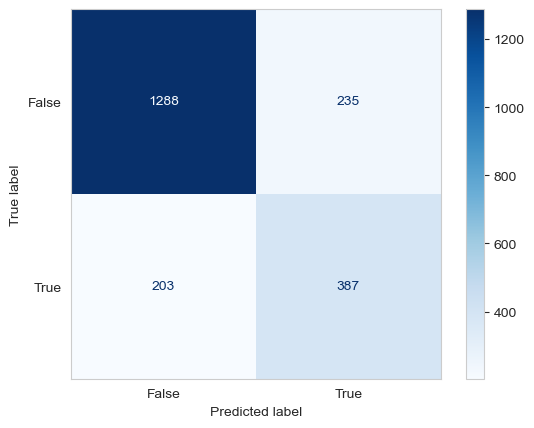

In [28]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_lin_best),display_labels=lin_fit.classes_)
disp = disp.plot(cmap='Blues')
plt.grid(False)
plt.show()

## KNN

In [30]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

Accuracy: 0.7529578797917653
              precision    recall  f1-score   support

       False       0.81      0.86      0.83      1523
        True       0.57      0.48      0.52       590

    accuracy                           0.75      2113
   macro avg       0.69      0.67      0.68      2113
weighted avg       0.74      0.75      0.75      2113



In [65]:
param_grid = {
    'n_neighbors': [3, 5, 8]
}
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid, cv=StratifiedKFold(5), scoring='f1')
grid_search_knn.fit(X_train, y_train)
y_pred_knn_cv = grid_search_knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_knn_cv))
print(classification_report(y_test, y_pred_knn_cv))

Accuracy: 0.7662091812588736
              precision    recall  f1-score   support

       False       0.82      0.87      0.84      1523
        True       0.60      0.50      0.54       590

    accuracy                           0.77      2113
   macro avg       0.71      0.68      0.69      2113
weighted avg       0.76      0.77      0.76      2113



In [59]:
grid_search_knn.best_params_

{'n_neighbors': 5}

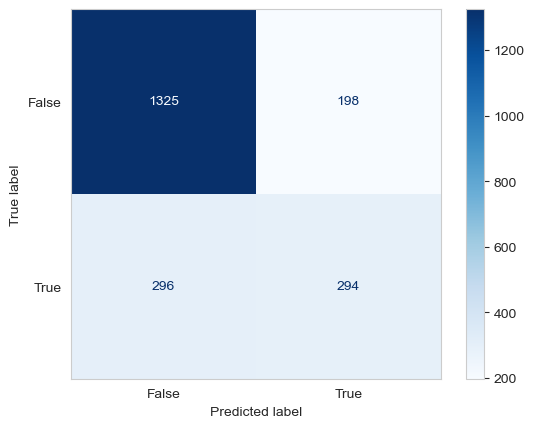

In [60]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_knn_cv),display_labels=grid_search_knn.classes_)
disp = disp.plot(cmap='Blues')
plt.grid(False)
plt.show()

## Random Forest

In [66]:
from sklearn.ensemble import RandomForestClassifier
rf_fit = RandomForestClassifier(random_state=123, class_weight="balanced")

param_grid = {
    'n_estimators': [100, 300, 500],
    'max_features': [5, 10, 'sqrt', 20],
    'max_depth': [3, 4, 5, 8],
    'bootstrap': [True, False]
}

grid_search_rf = GridSearchCV(estimator=rf_fit, param_grid=param_grid, cv=StratifiedKFold(5), scoring='f1')
grid_search_rf.fit(X_train, y_train)
y_pred_rf_cv = grid_search_rf.predict(X_test)

In [67]:
grid_search_rf.best_params_

{'bootstrap': True, 'max_depth': 5, 'max_features': 20, 'n_estimators': 100}

In [68]:
print("Accuracy:", accuracy_score(y_test, y_pred_rf_cv))
print(classification_report(y_test, y_pred_rf_cv))

Accuracy: 0.767628963558921
              precision    recall  f1-score   support

       False       0.89      0.78      0.83      1523
        True       0.56      0.74      0.64       590

    accuracy                           0.77      2113
   macro avg       0.72      0.76      0.73      2113
weighted avg       0.80      0.77      0.78      2113



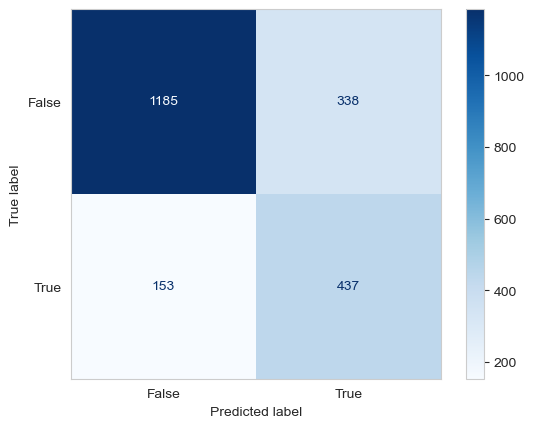

In [69]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_rf_cv),display_labels=grid_search_rf.classes_)
disp = disp.plot(cmap='Blues')
plt.grid(False)
plt.show()

In [70]:
best_model = grid_search_rf.best_estimator_

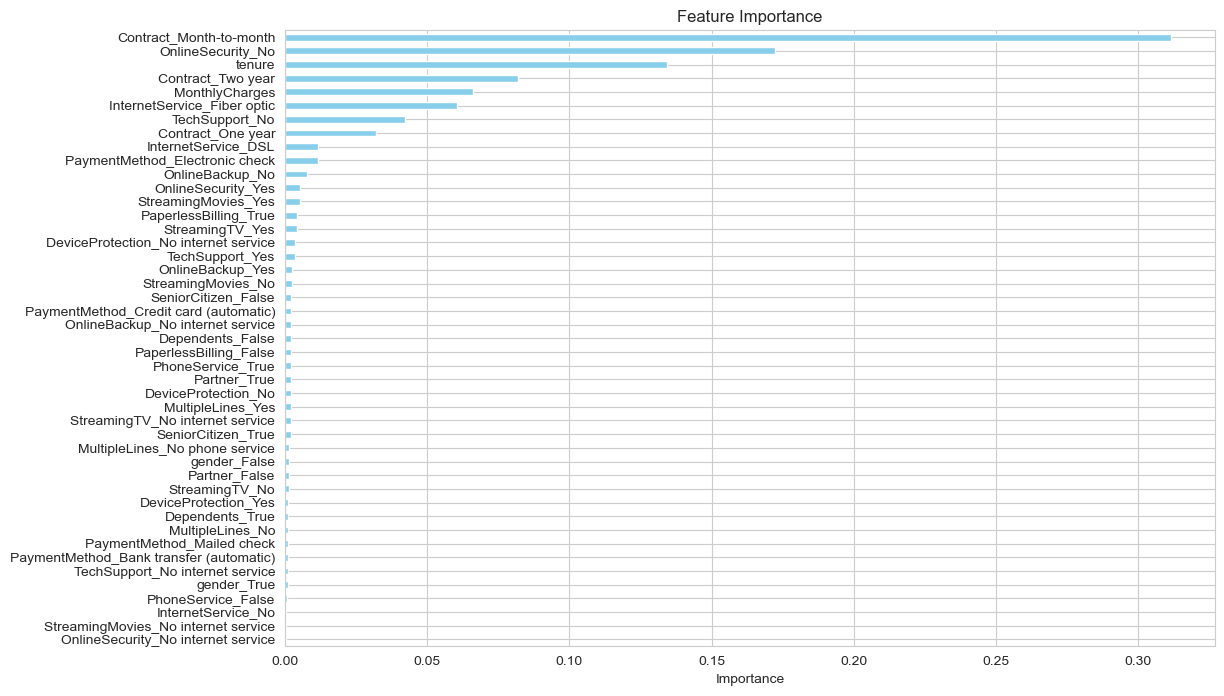

In [71]:
rf_importance = pd.Series(best_model.feature_importances_, index = grid_search_rf.feature_names_in_).sort_values(ascending=False)

plt.figure(figsize=(12, 8))
rf_importance.plot.barh(color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()

## Results with tuned decision threshold

In [76]:
y_prob_rf = best_model.predict_proba(X_test)[:, 1]
y_pred_rf_best = (y_prob_rf >= best_threshold).astype(int)
print("Accuracy:", accuracy_score(y_test, y_pred_rf_best))
print(classification_report(y_test, y_pred_rf_best))

Accuracy: 0.6975863700899195
              precision    recall  f1-score   support

       False       0.93      0.63      0.75      1523
        True       0.48      0.88      0.62       590

    accuracy                           0.70      2113
   macro avg       0.70      0.75      0.68      2113
weighted avg       0.80      0.70      0.71      2113



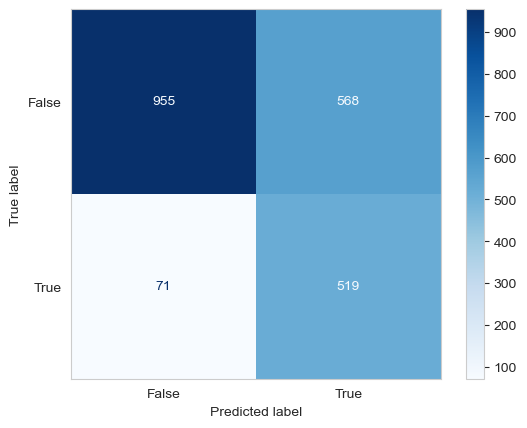

In [77]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_rf_best),display_labels=grid_search_rf.classes_)
disp = disp.plot(cmap='Blues')
plt.grid(False)
plt.show()

- In this case, I would prefer the default decision threshold for this model as it provided a more balanced prediction and less false positive results. However, if the problem demands a high true positive rate and false positives don't have a large impact then this could be the preferred method.

## XG Boost

In [78]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='error', random_state=123)

param_grid = {
        'n_estimators': [100, 300, 500],
        'max_depth': [3, 5, 8],
        'learning_rate': [0.01, 0.1, 0.3],
        'reg_lambda': [10, 100, 1000], 
        'reg_alpha':[10, 100, 1000], 
        'gamma': [10, 100, 1000]
    }

grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=StratifiedKFold(5), scoring='f1')
grid_search_xgb.fit(X_train, y_train)
y_pred_xgb_cv = grid_search_xgb.predict(X_test)

In [79]:
grid_search_xgb.best_params_

{'gamma': 10,
 'learning_rate': 0.3,
 'max_depth': 5,
 'n_estimators': 100,
 'reg_alpha': 10,
 'reg_lambda': 10}

In [80]:
print("Accuracy:", accuracy_score(y_test, y_pred_xgb_cv))
print(classification_report(y_test, y_pred_xgb_cv))

Accuracy: 0.783719829626124
              precision    recall  f1-score   support

       False       0.81      0.92      0.86      1523
        True       0.68      0.43      0.53       590

    accuracy                           0.78      2113
   macro avg       0.74      0.68      0.69      2113
weighted avg       0.77      0.78      0.77      2113



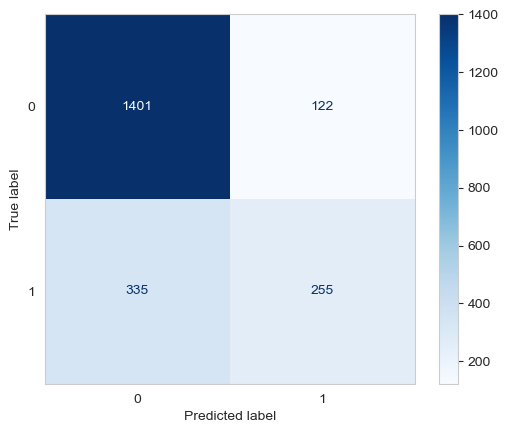

In [81]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_xgb_cv),display_labels=grid_search_xgb.classes_)
disp = disp.plot(cmap='Blues')
plt.grid(False)
plt.show()

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

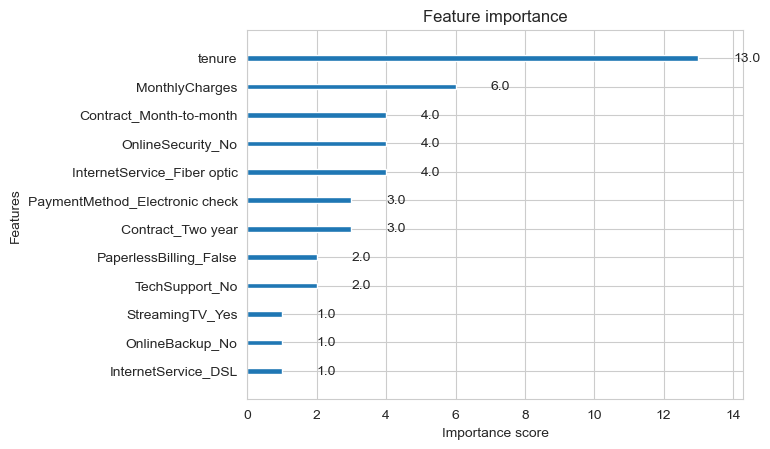

In [82]:
xgb.plot_importance(grid_search_xgb.best_estimator_)

## Try to improve the models ability to predict true positives and reduce the number of false negatives

In [83]:
neg_count = sum(y_train == 0)
pos_count = sum(y_train == 1)
scale_pos_weight_value = neg_count / pos_count

xgb_model_scaled = xgb.XGBClassifier(gamma= 10, learning_rate= 0.3, max_depth=3, n_estimators=100, reg_alpha=100, reg_lambda=100, scale_pos_weight=scale_pos_weight_value, objective='binary:logistic', eval_metric='error', random_state=123)
xgb_model_scaled.fit(X_train, y_train)
y_pred_xgb_scaled = xgb_model_scaled.predict(X_test)

In [84]:
print("Accuracy:", accuracy_score(y_test, y_pred_xgb_scaled))
print(classification_report(y_test, y_pred_xgb_scaled))

Accuracy: 0.7501183151916706
              precision    recall  f1-score   support

       False       0.90      0.73      0.81      1523
        True       0.54      0.80      0.64       590

    accuracy                           0.75      2113
   macro avg       0.72      0.76      0.72      2113
weighted avg       0.80      0.75      0.76      2113



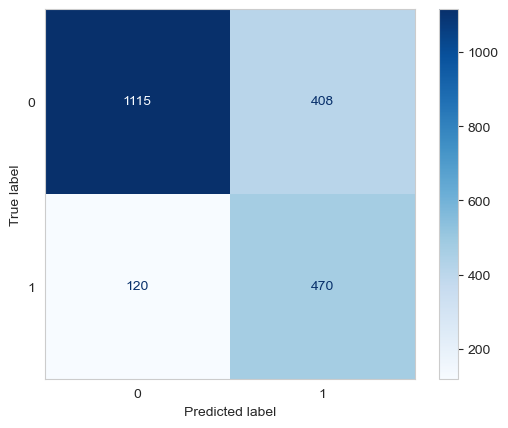

In [85]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_xgb_scaled),display_labels=xgb_model_scaled.classes_)
disp = disp.plot(cmap='Blues')
plt.grid(False)
plt.show()

# Conclusion

## Model Results

- All of the models above performed very similarly with an accuracy score between 75-80%
- Logistic Regression had the highest accuracy among all the models which indicates linear relationships exist between the predictor and the features in the model